In [461]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
import numpy as np 
import matplotlib.pyplot as plt 


In [462]:
def poly3(x):
    return 1/6*(x**3) - x**2/4 + x + 1
   

tensor([[  1.,   0.,   0.,   0.],
        [  1.,   1.,   1.,   1.],
        [  1.,   2.,   4.,   8.],
        [  1.,   3.,   9.,  27.],
        [  1.,   4.,  16.,  64.],
        [  1.,   5.,  25., 125.],
        [  1.,   6.,  36., 216.],
        [  1.,   7.,  49., 343.],
        [  1.,   8.,  64., 512.],
        [  1.,   9.,  81., 729.]], device='cuda:0')


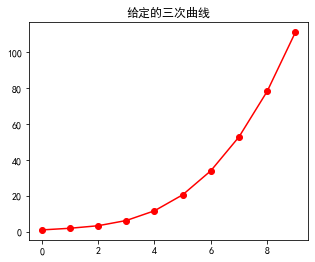

In [488]:
#拟合一段三次曲线
n = 10 
x = np.array(range(n))
y = poly3(x)
plt.figure(1,figsize=(5,4))
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(x,y,'ro-')
plt.title('给定的三次曲线')
dim = 4
X = np.array([x**i for i in range(dim)]).transpose()
X = torch.tensor(X).to(device='cuda').float()
print(X)

In [464]:
x = torch.tensor(x).to(device='cuda')
x = x.unsqueeze(dim = 1).float()
y = torch.tensor(y).to(device='cuda')
y = y.unsqueeze(dim = 1).float()
print('x = ',x)
print('y = ',y)


x =  tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]], device='cuda:0')
y =  tensor([[  1.0000],
        [  1.9167],
        [  3.3333],
        [  6.2500],
        [ 11.6667],
        [ 20.5833],
        [ 34.0000],
        [ 52.9167],
        [ 78.3333],
        [111.2500]], device='cuda:0')


In [468]:
class MLP(torch.nn.Module):
    def __init__(self,num_input,num_output,num_hidden=16):
        super(MLP,self).__init__()
        self.lin1 = Linear(num_input, num_output,bias = False)
        # self.lin2 = Linear(num_hidden,num_output)
    def forward(self,x):
        y = F.relu(self.lin1(x))
        y = F.dropout(y,p = 0.5)
        # y = F.relu(self.lin2(y))
        return y


In [475]:
num_input = dim
num_output = 1
model = MLP(num_input,num_output).to(device='cuda')
optimizer = torch.optim.Adam(model.parameters(),lr = 2e-2,weight_decay=5e-4)

# out = model(x)
# print(out)
# print(y)


In [476]:
epoches = 200
model.train()
for epoch in range(epoches):
    optimizer.zero_grad()
    out = model(X)
    loss = F.mse_loss(out,y)
    loss.backward()
    optimizer.step()
    print(f'epoch: {epoch+1}, the loss is: {loss:4f}')





epoch: 1, the loss is: 2308.348145
epoch: 2, the loss is: 2308.348145
epoch: 3, the loss is: 2308.348145
epoch: 4, the loss is: 2308.348145
epoch: 5, the loss is: 2308.348145
epoch: 6, the loss is: 2308.348145
epoch: 7, the loss is: 2308.348145
epoch: 8, the loss is: 2308.343262
epoch: 9, the loss is: 2308.348145
epoch: 10, the loss is: 2308.335938
epoch: 11, the loss is: 2308.348145
epoch: 12, the loss is: 2308.327393
epoch: 13, the loss is: 2308.322754
epoch: 14, the loss is: 2308.348145
epoch: 15, the loss is: 2308.312988
epoch: 16, the loss is: 2308.348145
epoch: 17, the loss is: 2308.348145
epoch: 18, the loss is: 2308.300049
epoch: 19, the loss is: 2308.295898
epoch: 20, the loss is: 2308.225830
epoch: 21, the loss is: 2300.859375
epoch: 22, the loss is: 1641.223999
epoch: 23, the loss is: 1709.843018
epoch: 24, the loss is: 1808.756104
epoch: 25, the loss is: 1608.315430
epoch: 26, the loss is: 1682.350220
epoch: 27, the loss is: 792.447876
epoch: 28, the loss is: 1699.453491
ep

Text(0.5, 1.0, '训练集上表现结果')

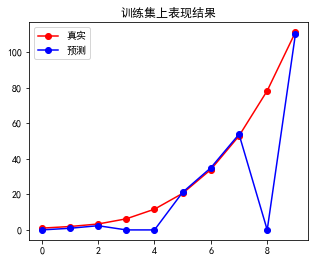

In [477]:
x_cpu  = x.cpu()
y_cpu = y.cpu()
out_cpu = model.cpu().detach()
plt.figure(1,figsize=(5,4))
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(x_cpu ,y_cpu,'ro-')

plt.plot(x_cpu ,out_cpu,'bo-')
plt.legend(['真实','预测'])
plt.title('训练集上表现结果')



In [502]:
pre = np.linspace(0,n,n*10)


In [503]:
Pre = np.array([pre**i for i in range(dim)]).transpose()


C:\Users\17718\AppData\Local\Temp\ipykernel_10248\259406757.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Pre = torch.tensor(Pre).to(device='cuda').float()


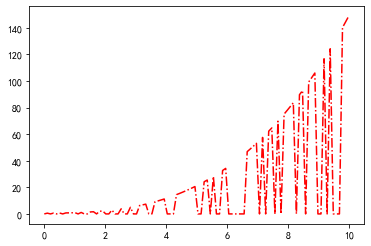

In [514]:
Pre = torch.tensor(Pre).to(device='cuda').float()
Out = model(Pre).detach().cpu()
plt.plot(pre,Out,'r-.')